In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def load_mocap_csv(file):
    with open(file, 'r') as f:
        lines = f.read().split('\n')

    data = pd.read_csv(io.BytesIO('\n'.join(lines[3:]).encode()))
    data = data.rename(columns={'Unnamed: 0': 'Frame',
                                'Unnamed: 1': 'Time',
                                'capo': 'capo.a',
                                'capo.1': 'capo.b',
                                'capo.2': 'capo.c', 
                                'capo.3': 'capo.d',
                                'capo.4': 'capo.x',
                                'capo.5': 'capo.y',
                                'capo.6': 'capo.z',
                                'capo.7': 'capo.Error Per Marker',
                                'caps': 'caps.a',
                                'caps.1': 'caps.b',
                                'caps.2': 'caps.c', 
                                'caps.3': 'caps.d',
                                'caps.4': 'caps.x',
                                'caps.5': 'caps.y',
                                'caps.6': 'caps.z',
                                'caps.7': 'caps.Error Per Marker'})
    data = data.loc[:, ['Frame', 'Time', 'capo.a', 'capo.b', 'capo.c', 'capo.d', 'capo.x', 'capo.y', 'capo.z', 'capo.Error Per Marker', 'caps.a', 'caps.b', 'caps.c', 'caps.d', 'caps.x', 'caps.y', 'caps.z', 'caps.Error Per Marker']]
    data = data.iloc[3:]
    data = data.set_index('Frame')
    data = data.astype(float)
    data.index = data.index.astype(int)
    
    return data

In [4]:
data = load_mocap_csv('Take 2019-12-08 05.03.55 PM Pose 1.csv')
data.head()

,Time,capo.a,capo.b,capo.c,capo.d,capo.x,capo.y,capo.z,capo.Error Per Marker,caps.a,caps.b,caps.c,caps.d,caps.x,caps.y,caps.z,caps.Error Per Marker
Frame,,,,,,,,,,,,,,,,,
0,0.000000,0.109082,0.985618,-0.071784,0.107267,0.390546,1.761362,2.284235,0.001863,0.194161,0.617768,-0.000329,-0.762013,1.069153,1.707155,2.748370,0.000658
1,0.016667,0.109289,0.985475,-0.070085,0.109469,0.391143,1.761961,2.285527,0.002203,0.194881,0.616323,-0.000231,-0.762999,1.068619,1.706918,2.747250,0.000334
2,0.033333,0.110492,0.985703,-0.067940,0.107546,0.392340,1.762468,2.285971,0.001910,0.195268,0.616511,0.001145,-0.762747,1.068486,1.706715,2.746564,0.000239
3,0.050000,0.110073,0.985733,-0.067840,0.107760,0.393356,1.763203,2.286890,0.001737,0.195637,0.616973,-0.001365,-0.762279,1.068438,1.707077,2.746208,0.000461
4,0.066667,0.112852,0.985389,-0.066858,0.108641,0.395161,1.763974,2.287340,0.001974,0.194305,0.617069,-0.002311,-0.762539,1.068422,1.707456,2.745392,0.000574


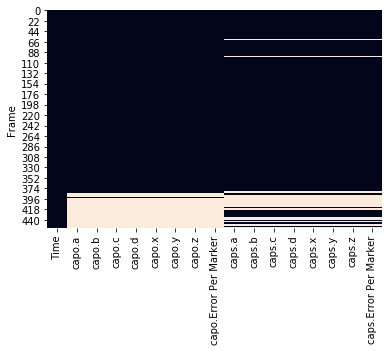

In [5]:
sns.heatmap(data.isnull(), cbar=False);